In [1]:
import networkx as nx
import matplotlib as plt
import numpy as np
import pandas as pd


In [13]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges      

def pathBand(path):
    path_len=len(path)
    #print(path)
    #print(path[0][0])
    resource=Resource[path[0][0]][path[0][1]][path[0][2]]
    for i in range(1,path_len):
        resource=list(map(lambda x: x[0]+x[1], zip(resource, Resource[path[i][0]][path[i][1]][path[i][2]])))
    pathbandList=zero_runs(resource) 
    
    return pathbandList

In [14]:
# the functions used to select wavelength and path

def randomWave(wavelist):
    random_seed=np.random.randint(len(wavelist))
    return wavelist[random_seed]

def randomPath(PathList,hopsList,wave,bandwidth,pathBandList):
    availablePath=[]
    PathHops=[]
    for i in range(len(pathBandList)):
        successflag=0
        path_band=pathBandList[i]
        if(wave+bandwidth>160):
            break
        for j in path_band:
            if(wave>=j[0] and wave+bandwidth<=j[1]):
                successflag=1
                break
        if(successflag==1):
            availablePath.append(PathList[i])
            PathHops.append(hopsList[i])
    if(len(availablePath)>0):
        Path=[]
        minHops=min(PathHops)
        pathIndex=[index for index, value in enumerate(PathHops) if value==minHops]
        for i in pathIndex:
            Path.append(availablePath[i])
        randomseed=np.random.randint(len(Path))
        return Path[randomseed]
    else:
        return []
            
    
    

In [15]:
def pathBand_Ocuupy(loc1,loc2,wave1,band,index):
    path=SD_pathLink[loc1][loc2]
    pathBand=ALL_SD_bandwidth[loc1][loc2]
    for i in range(len(path)):
        for j in range(band):
            #print(path)
            #print(wave1)
            #print(Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j])
            Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j]+=index+1
            
    return

        
def pathUpdate():
    SR_bandwidth=[]
    #MaxBand=[]
    Hops=[]
    for i in range(len(SD_pathLink)):
        band=[]
        #Max=[]
        hops=[]        
        for j in range(len(SD_pathLink[i])):
            #cost.append(pathCost(SD_pathLink[i][j]))
            hops.append(len(SD_pathLink[i][j]))
            b=pathBand(SD_pathLink[i][j])
            #Max.append(max(b[:,1] - b[:,0]))
            band.append(b)            
        #SR_pathLink_cost.append(cost)
        SR_bandwidth.append(band)
        #MaxBand.append(Max)
        Hops.append(hops)
    global ALL_SD_bandwidth
    ALL_SD_bandwidth=SR_bandwidth
        
    return

In [2]:
def CoreSetup():
    Nodes_list=list(G.nodes)
    #Link_bypass=[]
    for i in Nodes_list:
        neighborList=list(G.neighbors(i))
        #bypasscore_num=len(neighborList)-1# set the bypass core number within each fiber 
        for j in range(len(neighborList)):
            dis=1
            while(j+dis<len(neighborList)):
                input_loc=edges_list.index((neighborList[j],i))
                output_loc=edges_list.index((i,neighborList[j+dis]))
                successFlag=0
                for m in range(7):
                    if(len(bypassEdges[input_loc][m])==0):
                        for n in range(7):
                            if(len(bypassEdges[output_loc][n])==0):
                                bypassEdges[output_loc][n].append(((neighborList[j],i,m)))
                                bypassEdges[input_loc][m].append(((i,neighborList[j+dis],n)))
                                successFlag=1
                                break
                        if(successFlag==1):
                            break
                input_loc=edges_list.index((neighborList[j+dis],i))
                output_loc=edges_list.index((i,neighborList[j]))
                successFlag=0
                for m in range(7):
                    if(len(bypassEdges[input_loc][m])==0):
                        for n in range(7):
                            if(len(bypassEdges[output_loc][n])==0):
                                bypassEdges[output_loc][n].append(((neighborList[j+dis],i,m)))
                                bypassEdges[input_loc][m].append(((i,neighborList[j],n)))
                                successFlag=1
                                break
                        if(successFlag==1):
                            break
                                                                                                        
                dis+=1
    return;

In [10]:
def edgeToLinks(path):
    pathlist=[]
    path_len=len(path)
    corePossib=7**path_len
    for i in range(corePossib):
        List=[]
        List.append((path[0]+(i%7,)))
        edgeLoc=edges_list.index(path[0])
        
        if(len(In_bypassEdges[edgeLoc][i%7])>0):
            List=[]
            continue
        for j in range(1,path_len):
            List.append((path[j]+((int(i/(7**j)%7)),)))
            edgeLoc0=edges_list.index(path[j-1])
            edgeLoc1=edges_list.index(path[j])
            if(len(Out_bypassEdges[edgeLoc0][List[j-1][2]])>0 and List[j] not in Out_bypassEdges[edgeLoc0][List[j-1][2]] ) :

                List=[]
                break
            if(len(In_bypassEdges[edgeLoc1][List[j][2]])>0 and List[j-1] not in In_bypassEdges[edgeLoc1][List[j][2]] ) :

                List=[]
                break
        edgeLoc=edges_list.index(path[path_len-1])
        if(len(Out_bypassEdges[edgeLoc][int(i/(7**(path_len-1)))])>0):            
            List=[]
            continue 
        if(len(List)>0):
            pathlist.append(List)    
    return pathlist

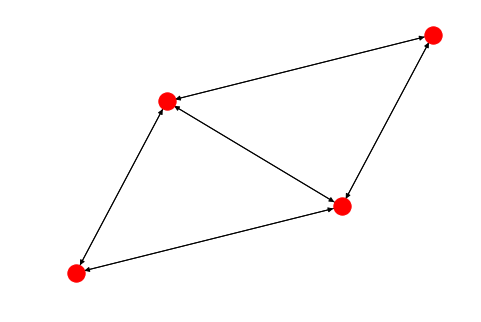

In [7]:
TrafficCost=0
node_list=[0,1,2,3]
SR_pair=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(0,3),(3,0),(1,3),(3,1)]
edges_list=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(1,3),(3,1)]
bypassEdges=[]
In_bypassEdges=[]
Out_bypassEdges=[]
for i in range(len(edges_list)):
    BY=[]
    BY0=[]
    BY1=[]
    
    for j in range(7):
        BY.append([])
        BY0.append([])
        BY1.append([])
    bypassEdges.append(BY)
    In_bypassEdges.append(BY0)
    Out_bypassEdges.append(BY1)
    

   
#先对D=2的节点进行bypass设置，在对D=3的节点进行bypass设置
#每次设置都在该link中不存在

G=nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(edges_list)
nx.draw(G)

#plt.show()


link_list=[] 

for k in range(len(edges_list)):
    link_list0=[]
    for i in range(7):
        link_list0.append(edges_list[k]+(i,)) 
    link_list.append(link_list0)

SD_path=[]
SR_pathLink=[]
for i in range(len(SR_pair)):
    path0=[]
    for path in nx.all_simple_paths(G, source=SR_pair[i][0], target=SR_pair[i][1]):
        path_edges=[]            
        for j in range(len(path)-1):
            path_edges.append((path[j],path[j+1]))
        path0.append(path_edges)
    SD_path.append(path0)


CoreSetup() 
for i in range(len(bypassEdges)):
    Link=bypassEdges[i]
    for j in range(7):
        if(len(Link[j])>0):
            if(Link[j][0][0]==edges_list[i][1]):
                
                Out_bypassEdges[i][j]=Link[j]
            elif(Link[j][0][1]==edges_list[i][0]):
                In_bypassEdges[i][j]=Link[j]
                

In [11]:
SD_pathLink=[]  
for i in range(len(SD_path)):
    Links=[]
    for j in range(len(SD_path[i])):
        Links=Links+edgeToLinks(SD_path[i][j])
        
    SD_pathLink.append(Links)


In [20]:
Total_bandwidth=161
Resource=np.zeros([4,4,7,160]).tolist()
ALL_SD_bandwidth=[]
MaxBand=[]
Hops=[]
for i in range(len(SD_pathLink)):
    Band=[]
    Max=[]
    Hhops=[]
    for j in range(len(SD_pathLink[i])):
        Hhops.append(len(SD_pathLink[i][j]))
        b=pathBand(SD_pathLink[i][j])
        Max.append(max(b[:,1] - b[:,0]))
        Band.append(b)
    ALL_SD_bandwidth.append(Band)
    MaxBand.append(Max)
    Hops.append(Hhops)

In [21]:
Traffic=pd.read_csv('traffic.csv',sep=',',names=['S','D','band'])
SuccessFlag=np.zeros(len(Traffic))
traffic_wave=[]
traffic_path=[]
Traffic_num=len(Traffic)
for i in range(Traffic_num):
    traffic=(Traffic['S'][i],Traffic['D'][i])
    band=Traffic['band'][i]
    traffic_Path=SD_pathLink[SR_pair.index(traffic)]
    traffic_Hops=Hops[SR_pair.index(traffic)]
    traffic_Band=ALL_SD_bandwidth[SR_pair.index(traffic)]
    wave=list(range(Total_bandwidth))
    while(len(wave)):
        PathFlag=0
        select_wave=randomWave(wave)
        print(select_wave)
        selectPath=randomPath(traffic_Path,traffic_Hops,select_wave,band,traffic_Band)
        if(len(selectPath)):
            Pathloc=traffic_Path.index(selectPath)
            pathBand_Ocuupy(SR_pair.index(traffic),Pathloc,select_wave,band,i)
            PathFlag=1
            traffic_wave.append(select_wave)
            traffic_path.append(selectPath)
            pathUpdate()
            break
        else:
            wave.remove(select_wave)
    
    if(PathFlag==1):
        SuccessFlag[i]=1
        
print(SuccessFlag) 

125
19
68
153
36
85
154
33
45
95
104
13
7
86
120
41
4
139
155
115
80
105
148
112
62
76
149
16
93
90
63
112
158
26
143
10
139
96
112
125
63
89
34
74
124
74
15
97
107
31
154
128
94
108
9
150
126
149
53
141
45
15
89
6
15
58
99
18
10
104
145
139
142
63
82
63
98
46
86
158
110
128
109
25
101
110
18
74
85
17
73
110
136
81
25
67
114
22
105
111
146
19
76
155
130
32
119
119
105
6
20
146
11
139
12
128
5
68
14
6
158
113
6
73
74
125
73
48
123
33
77
90
40
114
63
14
27
61
19
113
79
38
67
131
124
34
129
88
85
119
77
84
29
158
121
65
116
138
116
59
31
92
24
34
111
131
144
18
98
2
20
53
113
127
62
154
7
72
101
132
21
122
123
36
155
151
148
108
37
61
138
137
23
105
116
160
154
137
20
7
7
14
71
10
20
120
86
141
109
122
46
40
50
16
54
60
40
94
143
133
20
99
128
56
18
89
72
156
96
121
155
3
23
109
132
84
8
160
135
143
36
4
59
154
79
134
128
25
74
56
153
105
43
38
132
4
34
54
62
43
51
1
6
134
132
47
90
34
42
61
97
142
89
61
24
73
76
45
76
94
84
37
21
8
50
22
32
123
9
155
109
46
129
112
96
138
77
78
108
105
1

145
79
60
72
46
132
95
21
131
150
14
125
40
126
112
1
7
44
110
54
139
137
84
19
22
42
81
97
123
64
62
87
70
13
105
32
0
138
16
142
77
33
152
133
157
90
104
18
43
140
36
83
158
30
75
56
35
103
91
127
101
155
76
50
31
55
45
146
115
27
129
20
65
120
159
66
39
121
92
154
48
96
130
47
113
122
148
135
99
147
136
153
100
108
73
71
102
93
6
111
109
53
116
63
144
3
41
37
149
106
67
117
134
49
24
118
68
29
82
10
156
15
4
34
38
86
98
141
107
119
114
85
51
17
26
78
23
143
80
28
5
124
69
59
160
151
74
2
128
9
89
88
61
25
12
57
58
8
11
94
52
56
49
69
128
47
31
137
99
151
65
52
140
135
66
63
156
16
43
79
141
7
127
87
0
51
139
121
38
105
148
45
126
77
85
42
121
15
124
2
28
90
46
98
54
80
115
101
91
136
113
149
109
132
151
97
69
125
68
25
123
11
118
88
103
154
83
10
61
55
102
155
9
99
122
57
156
51
16
60
31
115
147
149
153
63
156
30
160
36
90
32
89
82
18
107
67
44
22
84
81
154
40
159
130
27
114
125
140
112
152
35
20
8
2
94
31
129
3
80
127
120
150
113
5
33
115
104
73
138
56
21
93
95
119
34
68
102
14
103

160
135
138
3
96
13
54
17
11
154
0
83
85
84
157
81
28
10
9
94
89
150
132
72
141
88
7
105
121
128
62
86
116
147
14
104
143
156
21
114
108
80
41
110
57
35
32
111
124
98
101
123
149
22
8
120
64
76
46
103
37
129
59
70
18
97
79
159
107
158
153
93
144
74
34
29
65
27
133
36
78
67
137
50
51
43
92
112
25
73
53
131
148
1
6
33
45
49
30
119
2
140
87
106
118
12
134
69
152
63
66
109
40
99
95
155
115
117
75
68
23
139
47
82
91
20
5
48
142
16
145
31
4
52
61
90
26
126
39
127
125
130
122
151
136
42
77
19
55
60
49
101
133
34
138
81
57
153
58
67
137
77
114
86
7
32
106
28
27
69
105
73
33
47
17
120
15
158
10
0
108
117
148
62
53
45
65
102
90
159
13
71
44
151
1
4
154
89
96
23
54
127
72
150
136
43
55
98
82
16
144
2
3
157
40
46
142
140
146
9
97
80
29
91
99
22
70
122
116
66
131
115
141
113
110
48
50
109
39
85
84
41
21
126
149
124
121
64
125
42
134
52
6
104
107
60
94
87
12
123
18
5
8
111
139
26
93
20
119
95
118
88
56
135
130
51
75
92
83
155
68
103
128
14
24
76
59
79
132
152
156
25
11
78
112
61
160
100
35
31
19
143

38
1
133
109
45
98
13
47
153
10
63
117
19
135
128
124
157
62
43
130
79
139
75
44
69
152
60
116
23
159
144
9
58
85
156
42
46
36
28
31
21
140
77
41
64
97
5
20
17
93
88
87
55
101
86
95
119
129
54
33
118
155
29
70
127
110
65
56
6
27
18
26
25
68
137
12
99
151
122
84
24
14
11
112
30
57
37
67
134
149
113
78
0
107
143
32
108
91
22
34
93
114
89
27
129
136
127
50
95
115
117
14
66
149
75
19
108
73
7
139
101
29
159
137
34
42
49
70
152
76
134
21
142
158
71
124
6
125
56
96
53
57
4
45
148
26
11
116
35
68
94
67
81
100
83
15
109
44
84
157
38
121
47
24
128
60
0
39
113
82
20
30
17
18
79
65
140
97
74
102
63
92
46
138
123
105
106
23
85
110
61
10
126
40
147
9
112
43
133
141
59
32
41
156
5
78
36
13
153
51
119
160
77
88
58
25
69
2
91
155
8
16
1
135
86
80
55
90
144
87
143
118
122
154
28
72
107
62
111
145
131
3
52
37
54
98
103
150
33
120
151
31
104
12
48
22
64
132
99
130
146
153
136
35
81
113
89
97
33
108
111
124
76
12
31
32
28
96
7
109
125
25
67
157
131
83
88
104
9
115
19
13
42
56
159
91
21
100
80
87
110
48
13

108
118
152
11
139
150
54
125
58
88
127
60
28
46
37
51
126
53
25
76
110
106
1
93
119
97
29
102
138
59
48
12
142
133
34
140
137
90
18
70
117
5
94
16
114
131
35
116
78
154
148
83
104
6
61
71
91
155
4
65
115
36
9
10
132
8
109
82
141
149
89
156
158
122
87
47
79
153
146
56
134
14
62
72
45
52
120
44
3
68
112
31
15
151
32
43
145
41
66
50
84
121
147
113
86
67
135
124
95
13
49
7
96
160
100
144
103
38
92
55
129
17
64
99
111
24
2
20
130
75
69
128
26
57
98
85
105
33
40
81
30
63
107
0
74
22
42
119
123
33
69
63
74
102
12
82
81
48
100
79
159
127
54
113
27
138
141
78
157
116
153
136
60
5
32
98
142
9
145
14
10
114
128
137
139
72
143
121
7
13
47
3
21
31
92
115
93
23
61
97
45
66
57
38
151
11
149
146
52
29
77
55
150
120
71
148
37
51
156
160
30
130
158
85
124
96
58
117
70
15
140
35
46
24
16
80
75
6
67
19
28
109
133
106
84
108
110
1
129
101
39
154
42
8
4
36
107
53
68
105
89
40
104
44
122
2
135
26
126
18
118
112
41
94
20
50
103
76
43
62
64
131
147
134
56
87
90
0
49
59
125
83
86
25
111
65
155
99
144
88
152
13

13
96
59
91
130
41
47
141
120
4
155
142
81
113
158
25
131
104
35
31
28
32
111
6
139
82
43
48
61
34
60
68
124
36
77
147
62
74
97
135
59
15
41
67
85
3
46
25
89
111
156
146
108
128
12
125
14
48
29
152
116
107
13
39
7
136
120
84
83
131
35
40
55
138
101
82
97
119
127
34
95
148
110
123
115
80
2
69
143
109
121
36
37
139
5
113
60
112
30
100
50
65
122
43
68
96
27
62
76
160
94
57
78
129
124
23
92
32
141
99
8
149
53
6
98
18
1
49
157
24
81
52
10
135
4
151
28
20
16
103
126
150
74
66
72
106
47
64
102
144
134
117
145
140
130
90
159
9
91
86
158
147
79
44
0
26
45
87
155
73
93
22
153
19
31
77
63
104
38
51
42
58
132
54
33
114
61
17
142
105
88
137
154
56
11
21
118
71
133
75
70
37
11
123
113
39
120
76
158
5
63
155
110
96
12
79
31
22
44
124
117
59
4
27
149
66
55
61
35
136
144
141
100
25
114
108
53
151
23
80
98
78
153
56
2
121
90
157
116
154
20
19
95
88
156
60
86
70
115
74
143
72
32
21
92
47
132
93
28
68
103
150
16
102
134
127
24
73
3
146
18
129
160
147
0
152
46
89
64
43
26
10
58
139
82
140
42
122
77
105
41


135
133
94
111
51
76
8
108
136
96
60
150
71
83
126
117
86
104
52
68
155
7
72
104
37
101
88
52
126
39
33
142
99
23
57
6
124
96
9
78
8
92
118
140
12
79
105
147
103
10
156
54
11
150
46
70
62
132
127
91
97
22
131
112
135
159
76
82
32
93
143
130
74
1
73
129
141
144
113
47
59
44
122
83
89
68
145
35
86
85
55
66
151
90
13
30
134
18
21
119
120
102
17
109
65
117
121
34
149
108
50
160
69
41
3
98
94
38
0
152
36
40
81
154
137
116
58
110
107
63
4
77
139
138
136
20
2
128
84
106
14
146
123
16
53
45
27
95
28
71
153
25
29
48
75
111
61
115
26
87
5
56
114
157
19
80
125
148
42
51
15
31
43
49
158
64
60
100
24
67
133
63
0
105
113
147
14
104
1
53
108
45
133
22
74
96
115
62
83
18
137
65
20
95
10
50
81
151
86
25
21
37
149
54
106
72
44
29
90
127
76
34
41
153
52
101
142
78
89
160
98
55
155
26
13
69
158
24
32
125
117
145
93
57
39
43
3
119
135
112
123
82
9
116
122
73
156
92
132
102
48
84
110
148
143
8
36
27
88
63
91
12
2
31
120
19
139
46
42
97
100
59
118
128
121
136
0
79
140
71
23
111
154
124
126
144
152
38
51
58
6

139
127
92
145
81
74
6
131
71
35
21
93
58
121
105
108
111
85
144
142
60
118
123
49
9
112
29
154
18
94
14
160
106
136
103
99
38
16
64
104
63
42
135
150
101
134
87
10
153
27
100
25
137
55
13
44
66
79
80
76
152
65
2
5
69
90
4
48
43
149
119
56
98
84
129
97
17
62
141
61
77
126
116
148
54
130
47
37
86
24
52
0
40
151
23
31
39
3
96
95
50
155
132
28
67
107
91
30
45
68
117
159
120
114
102
125
72
140
59
156
33
82
128
51
158
46
109
70
19
11
122
81
72
87
26
23
130
59
119
98
154
146
25
137
64
85
42
153
34
157
132
11
109
69
115
27
145
86
110
159
67
54
14
8
140
30
37
142
102
125
36
41
103
16
111
3
121
49
50
92
156
35
65
47
18
63
94
46
122
118
61
105
38
13
128
5
131
33
138
24
12
78
28
77
152
135
51
20
76
15
104
7
56
100
107
22
32
10
149
71
73
70
44
147
55
117
91
31
88
62
133
112
113
2
97
160
127
48
143
9
29
151
80
116
66
148
123
40
4
79
134
17
139
53
90
57
19
101
144
108
96
82
106
74
155
150
21
89
114
84
141
136
0
60
52
6
75
126
45
120
1
39
99
58
158
83
124
95
43
68
93
129
53
52
36
73
150
112
51
54
24


In [22]:
a=SuccessFlag.sum()
print(a)

396.0
